In [2]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancercancer = load_breast_cancer()

In [15]:
cancer = load_breast_cancer()

In [36]:
def answer_zero():
    print("the lenght of the features", len(cancer['feature_names']))
    print("the lenght of the data", len(cancer['data']))
answer_zero()

the lenght of the features 30
the lenght of the data 569


In [37]:
#preparing the data for the Machine learning action
# In this function, first we are going to add the coloumn name then
#we transpoing the data to make into the data panda frame work 

In [42]:
def answerone():
    col=np.append(cancer['feature_names'], ['target'])
    #print(column_names)
    #this will work like a header to the datafram
    #Adding data to the next array: this is the real data 
    data_list=np.vstack((cancer['data'].T, cancer['target'])).T
    return pd.DataFrame(columns=col, data=data_list)

In [50]:
#finding how many are mal and how many are beign
cancer_df=answerone()
def answer_two():
    print("the length of bel", len(cancer_df[cancer_df['target']==1]))
    print("the lenth of mal", len(cancer_df[cancer_df['target']==0]))

In [51]:
answer_two()

the length of bel 357
the lenth of mal 212


In [52]:
def answer_three():
 cancer_df=answerone()
 X=cancer_df[cancer['feature_names']]
 y=cancer_df['target']
 return X,y

In [53]:
answer_three()

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0         17.990         10.38          122.80     1001.0          0.11840   
 1         20.570         17.77          132.90     1326.0          0.08474   
 2         19.690         21.25          130.00     1203.0          0.10960   
 3         11.420         20.38           77.58      386.1          0.14250   
 4         20.290         14.34          135.10     1297.0          0.10030   
 5         12.450         15.70           82.57      477.1          0.12780   
 6         18.250         19.98          119.60     1040.0          0.09463   
 7         13.710         20.83           90.20      577.9          0.11890   
 8         13.000         21.82           87.50      519.8          0.12730   
 9         12.460         24.04           83.97      475.9          0.11860   
 10        16.020         23.24          102.70      797.8          0.08206   
 11        15.780         17.89          103.60     

In [67]:
def answer_four():
    from sklearn.model_selection import train_test_split
    X,y= answer_three()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    return X_train,X_test,y_train,y_test    

In [68]:
X_train,X_test,Y_train,Y_test = answer_four()

In [70]:
def answer_five():
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,Y_train)
    return knn
answer_five()
    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [80]:
Modal=answer_five()

In [88]:
def answer_six():
    cancer_data=answerone()
    means = cancer_data.mean()[:-1].values.reshape(1, -1)
    print(Modal.predict(means))
answer_six()

[ 1.]


In [89]:
answer_six()

[ 1.]


In [90]:
def answer_seven():
    return Modal.predict(X_test)

In [92]:
def answer_eight():
    return Modal.score(X_test,Y_test)

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
def accuracy_plot():
    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[Y_train==0]
    mal_train_y = Y_train[Y_train==0]
    ben_train_X = X_train[Y_train==1]
    ben_train_y = Y_train[Y_train==1]

    mal_test_X = X_test[Y_test==0]
    mal_test_y = Y_test[Y_test==0]
    ben_test_X = X_test[Y_test==1]
    ben_test_y = Y_test[Y_test==1]
   

    Scores=[Modal.score(mal_train_X,mal_train_y),Modal.score(ben_train_X,ben_train_y),Modal.score(mal_test_X,mal_test_y),Modal.score(mal_test_X,mal_test_y)]  

    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), Scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

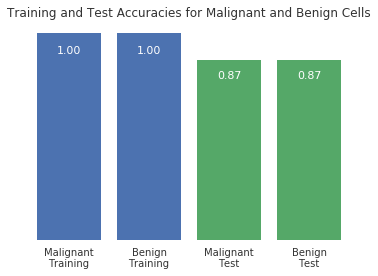

In [103]:
accuracy_plot()